In [1]:
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from tabulate import tabulate
from collections import Counter
import pandas as pd
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [2]:
df = pd.read_csv('customer_complaints_1.csv')

In [3]:
print(df['text'])

0     I used to love Comcast. Until all these consta...
1     I'm so over Comcast! The worst internet provid...
2     If I could give them a negative star or no sta...
3     I've had the worst experiences so far since in...
4     Check your contract when you sign up for Comca...
5     Thank God. I am changing to Dish. They gave me...
6     I Have been a long time customer and only have...
7     There is a malfunction on the DVR manager whic...
8     Charges overwhelming. Comcast service rep was ...
9     I have had cable, DISH, and U-verse, etc. in t...
10    Had them from 2014 to now. I'd tell new custom...
11    Disappointed. I have been a Comcast/Xfinity cu...
12    These people are unethical and disturbing obli...
13    Unplanned, unexpected, all day outages, rude s...
14    BE WARNED. You will have 10$ hidden fees when ...
15    Had Comcast. Overall the terrible experience e...
16    When I called the infinity customer service ce...
17    Outraged, that it should not take a month 

In [4]:
print(df['text'] )

0     I used to love Comcast. Until all these consta...
1     I'm so over Comcast! The worst internet provid...
2     If I could give them a negative star or no sta...
3     I've had the worst experiences so far since in...
4     Check your contract when you sign up for Comca...
5     Thank God. I am changing to Dish. They gave me...
6     I Have been a long time customer and only have...
7     There is a malfunction on the DVR manager whic...
8     Charges overwhelming. Comcast service rep was ...
9     I have had cable, DISH, and U-verse, etc. in t...
10    Had them from 2014 to now. I'd tell new custom...
11    Disappointed. I have been a Comcast/Xfinity cu...
12    These people are unethical and disturbing obli...
13    Unplanned, unexpected, all day outages, rude s...
14    BE WARNED. You will have 10$ hidden fees when ...
15    Had Comcast. Overall the terrible experience e...
16    When I called the infinity customer service ce...
17    Outraged, that it should not take a month 

In [5]:
# Vectorize the dataset
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['text'])

In [6]:
# Define the number of clusters
k = 3

In [7]:
# Create a k-means model and fit it to the data
km = KMeans(n_clusters=k)
km.fit(X)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [8]:
# Predict the clusters for each document
y_pred = km.predict(X)

In [9]:
# Display the document and its predicted cluster in a table
table_data = [["Document", "Predicted Cluster"]]
table_data.extend([[doc, cluster] for doc, cluster in zip(df['text'], y_pred)])
print(tabulate(table_data, headers="firstrow"))

Document                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [10]:
# Print top terms per cluster
print("\nTop terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()
for i in range(k):
    print("Cluster %d:" % i)
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])
    print()


Top terms per cluster:
Cluster 0:
 second
 boxes
 floor
 possible
 account
 adding
 the
 not
 to
 no

Cluster 1:
 the
 to
 and
 for
 you
 it
 they
 is
 my
 was

Cluster 2:
 internet
 dealing
 late
 non
 classes
 multiple
 assignments
 stopping
 verizon
 rather



In [11]:
# Calculate purity
total_samples = len(y_pred)
cluster_label_counts = [Counter(y_pred)]
purity = sum(max(cluster.values()) for cluster in cluster_label_counts) / total_samples

print("Purity:", purity)

Purity: 0.8947368421052632


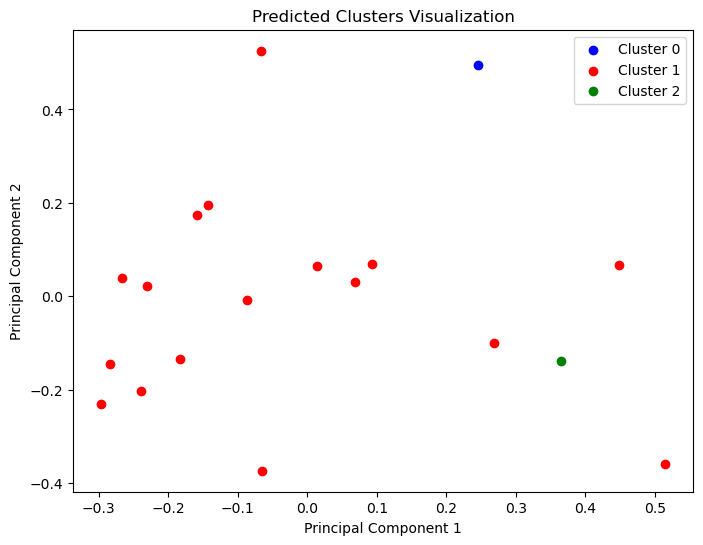

In [12]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
# Reduce dimensionality using PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

# Plot the predicted clusters
plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green']
for i in range(k):
    plt.scatter(X_pca[y_pred == i, 0], X_pca[y_pred == i, 1], c=colors[i], label=f'Cluster {i}')
plt.title('Predicted Clusters Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()